In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
import scipy.optimize as opt
import notebooks.gaswateroil as chGWO

#### Список функций представленных в файле для проведения расчетов:

* w_gaswater_choke_kghr(p1_atm, p2_atm, X, gamma_g=0.55, T_С=20, d0_mm=5, d1_mm=100) Расчет расхода водогазовой смеси через штуцер по методике Чиена (Миллера)
  
  
* p_gaswater_upchoke_atm(w_kghr,p2_atm,X,gamma_g, T_С=20,d0_mm=5, d1_mm=100) Расчет давления водогазовой смеси перед клапаном по методике Чиена (Миллера)
 
 
* p_gaswater_downchoke_atm( w_kghr, p1_atm, X,gamma_g, T_С=20,d0_mm=5,d1_mm=100) Расчет давления на выходе от давления на входе при разных расходах по методике Чиена (Миллера)


* f_gaswater_difpressurechoke_atm(w_kghr,p1_atm,X,gamma_g, T_С=20,d0_mm=5, d1_mm=100) Расчет разницы давлений до и после штуцера водогазовой смеси по методике Чиена (Миллера)
 
 
* w_gasoil_choke_kghr(p1_atm, p2_atm, X, gamma_g=0.55,gamma_oil=0.8, T_С=20, d0_mm=5, d1_mm=100,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет расхода нефтегазовой смеси через штуцер по методике Чиена (Миллера)
 
 
* p_gasoil_upchoke_atm(w_kghr,p2_atm,X,gamma_g=0.55,gamma_oil=0.8, T_С=20, d0_mm=5, d1_mm=100,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления водогазовой смеси перед клапаном по методике Чиена (Миллера)
 
 
* p_gasoil_downchoke_atm( w_kghr, p1_atm, X,gamma_g=0.55, gamma_oil=0.8, T_С=20,d0_mm=5,d1_mm=100,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления на выходе от давления на входе при разных расходах по методике Чиена (Миллера)
 
 
* f_gasoil_difpressurechoke_atm(w_kghr,p1_atm,X,gamma_g=0.55, gamma_oil=0.8, T_С=20,d0_mm=5, d1_mm=100,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет разницы давлений до и после штуцера водогазовой смеси по методике Чиена (Миллера)
 
 
* q_gaswater_choke_kghr(p1_atm, p2_atm, xg, gamma_g=0.55, T_С=20, dchoke_mm=5) Расчет расхода водогазовой смеси через штуцер по методике Альсафран 
   
   
* q_gasoil_choke_kghr(p1_atm, p2_atm, xg, gamma_g=0.55, gamma_oil=0.8, T_С=20, dchoke_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет расхода нефтегазовой смеси через штуцер по методике Альсафран 
   
   
* q_critgaswater_choke_kghr(p1_atm, xg, dchoke_mm=5,gamma_g=0.55, T_С=20) Расчет критического расхода водогазовой смеси через штуцер по методике Альсафран 
    
    
* q_critgasoil_choke_kghr(p1_atm, xg, gamma_g=0.55, gamma_oil=0.8, T_С=20, dchoke_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет критического расхода нефтегазовой смеси через штуцер по методике Альсафран
   
   
* p_gw_upchoke_atm(w_kghr,p2_atm,xg,gamma_g=0.55, T_С=20,dchoke_mm=5) Расчет давления водогазовой смеси перед клапаном по методике Альсафран
   
   
* p_go_upchoke_atm(w_kghr,p2_atm,xg,gamma_g=0.55, gamma_oil=0.8, T_С=20, dchoke_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления нефтегазовой смеси перед клапаном по методике Альсафран
  
  
* p_gw_downchoke_atm(w_kghr,p1_atm,xg,gamma_g=0.55, T_С=20,dchoke_mm=5) Расчет давления водогазовой смеси перед клапаном по методике Альсафран
    
* p_go_downchoke_atm(w_kghr,p1_atm,xg,gamma_g=0.55, gamma_oil=0.8, T_С=20, dchoke_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления газонефтяной смеси перед клапаном по методике Альсафран
  
  
* f_gw_difpressurechoke_atm(w_kghr,p1_atm,xg,gamma_g=0.55, T_С=20,dchoke_mm=5) Расчет разницы давлений до и после штуцера водогазовой смеси по методике Aльсафран
    
    
* f_go_difpressurechoke_atm(w_kghr,p1_atm,xg,gamma_g=0.55, gamma_oil=0.8, T_С=20, dchoke_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет разницы давлений до и после штуцера нефтегазовой смеси по методике Aльсафран
    
    
* W_gaswater_choke_kghr(p1_atm,p2_atm, fg, gamma_g=0.55,T_C=20, d2_mm=5) Расчет расхода водогазовой смеси через штуцер по методике Перкинса
    
    
* W_gasoil_choke_kghr(p1_atm,p2_atm, fg, gamma_g=0.55,T_C=20, d2_mm=5,gamma_oil=0.8, pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет расхода нефтегазовой смеси через штуцер по методике Перкинса
    
    
* W_critsgaswater_choke_kghr(p1_atm, fg, gamma_g=0.55, T_C=20, d2_mm=5) Расчет критического расхода водогазовой смеси через штуцер по методике Перкинса
    
    
* W_critgasoil_choke_kghr(p1_atm, fg, gamma_g=0.55,T_C=20, d2_mm=5,gamma_oil=0.8, pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет критического расхода нефтегазовой смеси через штуцер по методике Перкинса
    
    
* p_gwater_upchoke_atm(w_kghr,p2_atm,fg,gamma_g=0.55, T_С=20,d2_mm=5) Расчет давления водогазовой смеси перед клапаном по методике Перкинса
    
    
* p_goil_upchoke_atm(w_kghr,p2_atm,fg,gamma_g=0.55,gamma_oil=0.8, T_С=20, d2_mm=5, pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления водогазовой смеси перед клапаном по методике Перкинса
    
    
* p_gwater_downchoke_atm(w_kghr,p1_atm,fg,gamma_g=0.55, T_С=20,d2_mm=5) Расчет давления водогазовой смеси перед клапаном по методике Перкинса
    
    
* p_goil_downchoke_atm(w_kghr,p1_atm,fg,gamma_g=0.55, gamma_oil=0.8, T_С=20, d2_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления газонефтяной смеси перед клапаном по методике Перкинса
    
    
* f_gwater_difpressurechoke_atm(w_kghr,p1_atm,fg,gamma_g=0.55, T_С=20,d2_mm=5) Расчет разницы давлений до и после штуцера водогазовой смеси по методике Перкинса
    
    
* f_goil_difpressurechoke_atm(w_kghr,p1_atm,fg,gamma_g=0.55, gamma_oil=0.8, T_С=20, d2_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет разницы давлений до и после штуцера нефтегазовой смеси по методике Перкинса
    
    
* W_gasoilwater_choke_kghr(p1_atm,p2_atm, fg, fo,fw, gamma_g=0.55,T_C=20, d2_mm=5,gamma_oil=0.8, pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет расхода трехфазной смеси через штуцер по методике Перкинса
    
    
*  W_crit_gasoilwater_choke_kghr(p1_atm, fg, fo,fw, gamma_g=0.55,T_C=20, d2_mm=5,gamma_oil=0.8, pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет расхода трехфазной смеси через штуцер по методике Перкинса
    
    
* p_gasoilwater_upchoke_atm(w_kghr,p2_atm,fg,fo,fw,gamma_g=0.55,gamma_oil=0.8, T_С=20, d2_mm=5, pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления  трехфазной смеси перед клапаном по методике Перкинса
    
    
*  p_gasoilwater_downchoke_atm(w_kghr,p1_atm,fg,fo,fw, gamma_g=0.55, gamma_oil=0.8, T_С=20, d2_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет давления трехфазной смеси перед клапаном по методике Перкинса
   
   
*  f_gasoilwater_difpressurechoke_atm(w_kghr,p1_atm,fg,fo,fw, gamma_g=0.55, gamma_oil=0.8, T_С=20, d2_mm=5,pb_MPa= 20,co_1MPa= 0.002,rs_m3m3=300,bo_m3m3=1) Расчет разницы давлений до и после штуцера трехфазной смеси по методике Перкинса

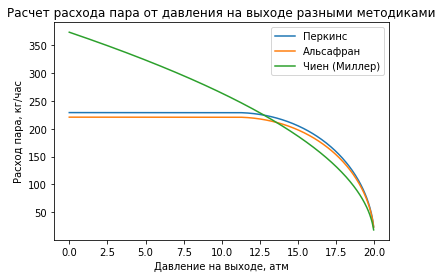

In [11]:
p1_atm=20
p2_a=np.arange(0,p1_atm,0.05)
q1=np.array([])
q2=np.array([])
q3=np.array([])
for p2_atm in p2_a:
    p1=chGWO.w_gaswater_choke_kghr(p1_atm, p2_atm, 1) 
    p2=chGWO.q_gaswater_choke_kghr(p1_atm, p2_atm, 1)
    p3=chGWO.W_gaswater_choke_kghr(p1_atm,p2_atm, 1)
    q1=np.append(q1,p1)
    q2=np.append(q2,p2)
    q3=np.append(q3,p3)
plt.plot(p2_a,q3,label='Перкинс') 
plt.plot(p2_a,q2,label='Альсафран')
plt.plot(p2_a,q1,label='Чиен (Миллер)')
plt.title('Расчет расхода пара от давления на выходе разными методиками')
plt.ylabel('Расход пара, кг/час')
plt.xlabel('Давление на выходе, атм')
plt.legend()
plt.show()

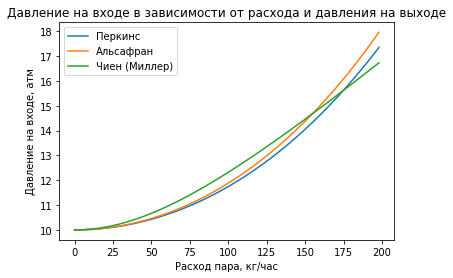

In [17]:
'Построение графика "Давление на входе в зависимости от расхода и давления на выходе"'
p2_atm=10
w_kghr_a=np.arange(0,200,2) # расход, кг/час для которого находится давление на выходе
q1=np.array([])
q2=np.array([])
q3=np.array([])        
for w_kghr in w_kghr_a:
    p1=chGWO.p_gaswater_upchoke_atm(w_kghr,p2_atm,1,0.55) 
    p2=chGWO.p_gw_upchoke_atm(w_kghr,p2_atm,1)
    p3=chGWO.p_gwater_upchoke_atm(w_kghr,p2_atm,1)
    q1=np.append(q1,p1)
    q2=np.append(q2,p2)
    q3=np.append(q3,p3)
plt.plot(w_kghr_a,q3,label='Перкинс') 
plt.plot(w_kghr_a,q2,label='Альсафран')
plt.plot(w_kghr_a,q1,label='Чиен (Миллер)')
plt.title('Давление на входе в зависимости от расхода и давления на выходе')
plt.xlabel('Расход пара, кг/час')
plt.ylabel('Давление на входе, атм')   
plt.legend()
plt.show()  

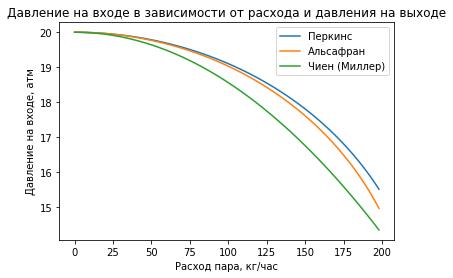

In [18]:
'Построение графика "Давление на выходе в зависимости от расхода и давления на входе"'
p1_atm=20
w_kghr_a=np.arange(0,200,2) # расход, кг/час для которого находится давление на выходе
q1=np.array([])
q2=np.array([])
q3=np.array([])        
for w_kghr in w_kghr_a:
    p1=chGWO.p_gaswater_downchoke_atm( w_kghr, p1_atm, 1,0.55)  
    p2=chGWO.p_gw_downchoke_atm(w_kghr,p1_atm,1)
    p3=chGWO.p_gwater_downchoke_atm(w_kghr,p1_atm,1)
    q1=np.append(q1,p1)
    q2=np.append(q2,p2)
    q3=np.append(q3,p3)
plt.plot(w_kghr_a,q3,label='Перкинс') 
plt.plot(w_kghr_a,q2,label='Альсафран')
plt.plot(w_kghr_a,q1,label='Чиен (Миллер)')
plt.title('Давление на выходе в зависимости от расхода и давления на входе')
plt.xlabel('Расход пара, кг/час')
plt.ylabel('Давление на выходе, атм')   
plt.legend()
plt.show()  